In [35]:
from IPython.display import IFrame


In [36]:
%matplotlib inline

# *Hubble y los orígenes de DESI*

¡El año 1929 nos trajo los Oscar, la primera radio de coche y la inesperada observación de Edwin Hubble de que todas las galaxias se están alejando de nosotros!

![title](https://github.com/michaelJwilson/desihigh/blob/main/desihigh/images/edwin-hubble.jpg?raw=1)

Echemos un vistazo rápido a algunas de las galaxias que estaba viendo, Triángulo y la Gran Nube de Magallanes.

![title](https://github.com/michaelJwilson/desihigh/blob/main/desihigh/images/Triangulum.jpg?raw=1)
![title](https://github.com/michaelJwilson/desihigh/blob/main/desihigh/images/LMC.jpg?raw=1)

En total, Edwin estudió la distancia de nosotros a 24 galaxias, y sus 'desplazamientos al rojo' observados. ¿Qué significa eso?

Tal vez ya sepas que los niveles de energía del hidrógeno están __cuantizados__, con electrones que habitan una serie de capas con energías __discretas__. Cuando un electrón transita de un nivel de mayor energía a otro de menor, se emite luz con una longitud de onda  dada específicamente por la fórmula de "Rydberg":

$$ \frac{1}{\lambda_{\rm vac}} = 1.096 \times 10^{7} \left ( \frac{1}{n^2} - \frac{1}{m^2} \right ) $$

donde $n$ y $m$ (cualquiera de $[0, 1, 2, ... \infty]$) etiquetan los dos niveles de energía.

In [12]:
# Primero, importemos algunos paquetes útiles :
import astropy
import pylab           as     pl
import pandas          as     pd
import numpy           as     np

from   matplotlib      import pyplot as plt
from   scipy           import stats
from   IPython.display import Image
from   pkg_resources   import resource_filename

In [ ]:
# Para nuestros amigos utilizando Google Colab - recuerda 
# montar tu drive para poder ejecutar los cuadernos de trabajo, excepto para Colab.ipynb
# 
# Ignora estas celdas si no estás en Colab!
sys.path.append('/content/drive/MyDrive/desihigh/')

In [ ]:
from   tools           import pubplot

from   tools.wave2rgb  import wavelength_to_rgb

In [5]:
def Rydberg(n, m):
    # Longitud de onda [nanometros]
    result = 1.096e-2 * (1. / n / n - 1. / m / m)
    return 1. / result

Veamos qué longitudes de onda de la luz que puede emitir el hidrógeno:

In [6]:
waves = []

print('n \t m \t Longitud de onda [nm]')

for n in np.arange(1, 10, 1):
    for m in np.arange(n+1, 10, 1):
        wave = Rydberg(n, m)        
        waves.append(wave)
        
        print('{:d} \t {:d} \t {:.3f}'.format(n, m, wave))

n 	 m 	 Longitud de onda [nm]
1 	 2 	 121.655
1 	 3 	 102.646
1 	 4 	 97.324
1 	 5 	 95.043
1 	 6 	 93.848
1 	 7 	 93.142
1 	 8 	 92.689
1 	 9 	 92.381
2 	 3 	 656.934
2 	 4 	 486.618
2 	 5 	 434.480
2 	 6 	 410.584
2 	 7 	 397.405
2 	 8 	 389.294
2 	 9 	 383.923
3 	 4 	 1876.955
3 	 5 	 1283.075
3 	 6 	 1094.891
3 	 7 	 1005.931
3 	 8 	 955.541
3 	 9 	 923.814
4 	 5 	 4055.150
4 	 6 	 2627.737
4 	 7 	 2167.662
4 	 8 	 1946.472
4 	 9 	 1819.203
5 	 6 	 7465.163
5 	 7 	 4657.086
5 	 8 	 3743.215
5 	 9 	 3299.335
6 	 7 	 12380.685
6 	 8 	 7507.821
6 	 9 	 5912.409
7 	 8 	 19075.426
7 	 9 	 11316.720
8 	 9 	 27823.100


Ahora grafiquemos las longitudes de onda y veamos el color de estas líneas. Si tuviéramos que mirar un átomo de hidrógeno emisor, veríamos esto:

(380.0, 780.0)

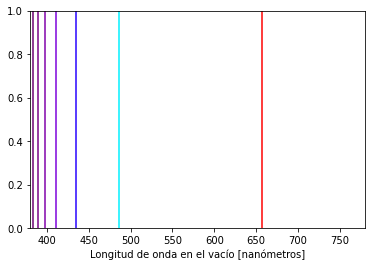

In [7]:
for wave in waves:
  # color = [r, g, b]
  color = wavelength_to_rgb(wave)       
  pl.axvline(x=wave, c=color)

pl.xlabel('Longitud de onda en el vacío [nanómetros]')
pl.xlim(380., 780.)

Si existe hidrógeno en una galaxia que se está moviendo, vemos que las líneas se desplazan por efecto Doppler. A esto lo llamamos "desplazamiento al rojo" o "corrimiento al rojo", comúnmente denotado como $z$, puedes leer más sobre esto [aquí](https://es.wikipedia.org/wiki/Corrimiento_al_rojo). Supongamos que una galaxia se está moviendo a 1% de la velocidad de la luz ($v=0.1*c$), podemos calcular el corrimiento al rojo con la siguiente ecuación.
$$
1 + z = \sqrt{\frac{1 + v/c}{1 - v/c}}
$$

In [8]:
def redshift(v):
    # v [velocidad de la Luz] (velocidad considerando c=1).
    result = (1. + v) / (1. - v) 
    result = np.sqrt(result) - 1.
    
    return  result

(380.0, 780.0)

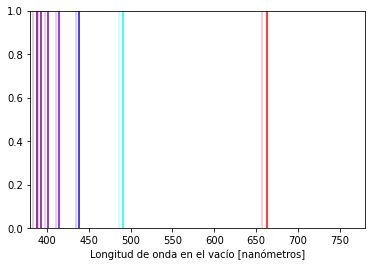

In [9]:
zz = redshift(0.01) 

for restwave in waves:
  obswave = (1. + zz) * restwave     

  color   = wavelength_to_rgb(restwave)       
  pl.axvline(x=restwave, c=color, alpha=0.25)

  color   = wavelength_to_rgb(obswave)       
  pl.axvline(x=obswave, c=color)

pl.xlabel('Longitud de onda en el vacío [nanómetros]')
pl.xlim(380., 780.)

Aquí puedes ver la línea original (tenue) y la línea desplazada debido a que la galaxia con el hidrógeno emisor se está moviendo. [Aquí](https://es.wikipedia.org/wiki/Efecto_Doppler) encontrarás todos los detalles.

Hubble conocía las líneas del hidrógeno y muchos otros elementos. Al invertir lo anterior, pudo calcular la velocidad de muchas galaxias. Descubrió qué tan lejos estaban (usando la información de qué tan brillantes eran algunas [estrellas especiales en la galaxia](https://es.wikipedia.org/wiki/Estrella_variable_Cefeida)) y qué tan rápido se estaban moviendo (a partir de su desplazamiento al rojo):

In [13]:
hub = resource_filename('desihigh','dat/hubble.dat')

In [14]:

dat = pd.read_csv(hub, sep='\s+', comment='#', names=['Galaxia', 'Distancia [Mpc]', 'Velocidad [km/s]'])
dat

,Galaxia,Distancia [Mpc],Velocidad [km/s]
0,S.Mag,0.032,170
1,L.Mag,0.034,290
2,NGC6822,0.214,-130
3,NGC598,0.263,-70
4,NGC221,0.275,-185
5,NGC224,0.275,-220
6,NGC5457,0.450,200
7,NGC4736,0.500,290
8,NGC5194,0.500,270
9,NGC4449,0.630,200


Vamos a graficarlas.

In [15]:
fig = plt.figure(figsize=(10, 7.5))
ax  = fig.add_subplot(1, 1, 1)
plt.close()

In [16]:
label_style = {'fontname': 'DejaVu Sans', 'fontsize': 16} 

In [17]:
ax.plot(dat['Distancia [Mpc]'], dat['Velocidad [km/s]'], '-', c='k', marker='*', lw=0)

ax.set_xlabel('Distancia desde Nosotros [Megaparsecs]', **label_style)
ax.set_ylabel('Velocida de Recesión [km/s]', **label_style)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

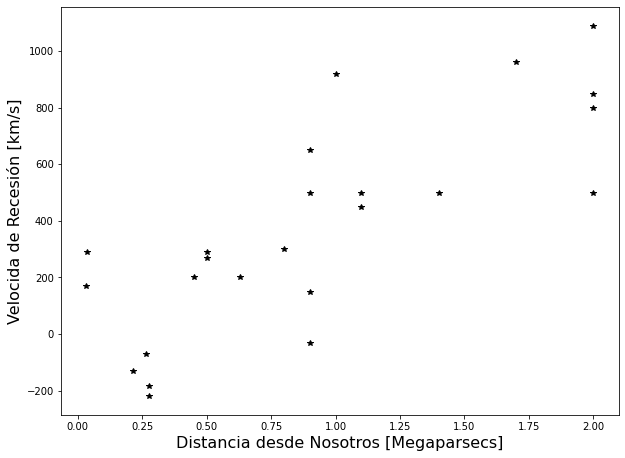

In [18]:
fig

Edwin vio una tendencia clara, pero las mediciones parecían bastante ruidosas. Intentemos hacer nuestra mejor suposición sobre la verdadera relación entre los dos. Construiremos una relación lineal (regresión) usando el paquete scipy stats:

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dat['Distancia [Mpc]'],dat['Velocidad [km/s]'])

In [20]:
print('La pendiente de esta tendencia (slope) es conocida como la constante de Hubble:  {:.3f} [km/s/Mpc]'.format(slope))

La pendiente de esta tendencia (slope) es conocida como la constante de Hubble:  454.158 [km/s/Mpc]


¿Cómo se ve esto?.

In [21]:
distances  = np.linspace(-0.5, 2.5, 10)
velocities = slope * distances

ax.plot(distances, velocities, lw=0.25, c='k')
ax.set_xlim(0.0, 2.5)

(0.0, 2.5)

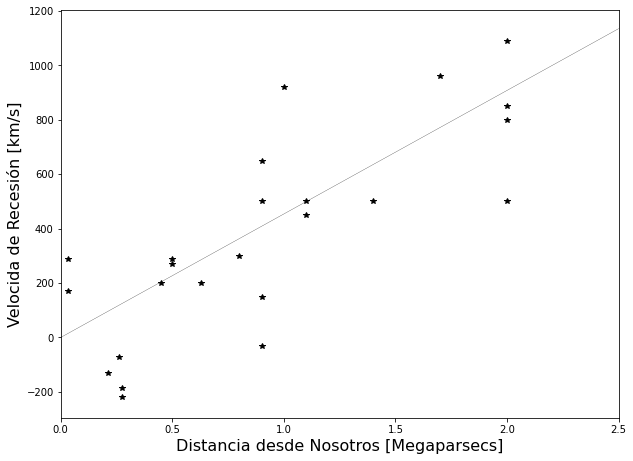

In [22]:
fig

¡Parece un ajuste bastante bueno!

Ahora es tu turno, ¿puedes hacer una buena estimación del error en esta medición de la constante del Hubble? ¿Con qué precisión podemos predecir la recesión de una galaxia a una distancia determinada, es decir, qué tan rápido o lento podría moverse?

Entonces, en conclusión, ¡es probable que todas las galaxias se alejen de nosotros! Descubrimos que esto es cierto para todas las galaxias: no estamos en el centro ni somos especiales de ninguna manera. Cada galaxia se aleja de las demás. El hecho de que el Universo se estuviera expandiendo fue un shock para muchos en 1929, pero les esperaba una sorpresa aún mayor.

# *Energía oscura*

En 1998, el mundo cambiaría para siempre. Larry Page y Sergey Brin fundaron Google, el nodo American Unity y el módulo ruso Zarya se unirían para formar la [Estación Espacial Internacional](https://es.wikipedia.org/wiki/Estación_Espacial_Internacional ) y Saul Perlmutter (del laboratorio Lawrence Berkeley), Brian Schmidt y Adam Reiss, confirmaron irrefutablemente la existencia de la _Energía Oscura_ (_Dark Energy_). Aquí está Saul impresionando a algunos jóvenes investigadores de Berkeley con estos resultados en ese momento:

![title](https://github.com/michaelJwilson/desihigh/blob/main/desihigh/images/perlmutter.png?raw=1)

Entonces, ¿qué estaban mirando todos? Analicemos los datos.

Saul y su equipo midieron el corrimiento al rojo ($z$) y la magnitud efectiva de varias [Supernovas tipo Ia](https://es.wikipedia.org/wiki/Supernova_de_tipo_Ia).

In [24]:
perl    = resource_filename('desihigh', 'dat/perlmutter.txt')

In [25]:
datos     = pd.read_csv(perl, names=['z', 'Magnitud Efectiva'], comment='#', sep='\s+')
toprint = datos[:10]
toprint

,z,Magnitud Efectiva
0,0.458,23.11
1,0.354,22.38
2,0.425,22.13
3,0.374,21.72
4,0.420,22.55
5,0.372,22.26
6,0.378,22.58
7,0.453,23.17
8,0.465,23.33
9,0.498,23.71


Un gráfico mostraría esto mucho más claramente:

Text(0, 0.5, 'Magnitud Efectiva')

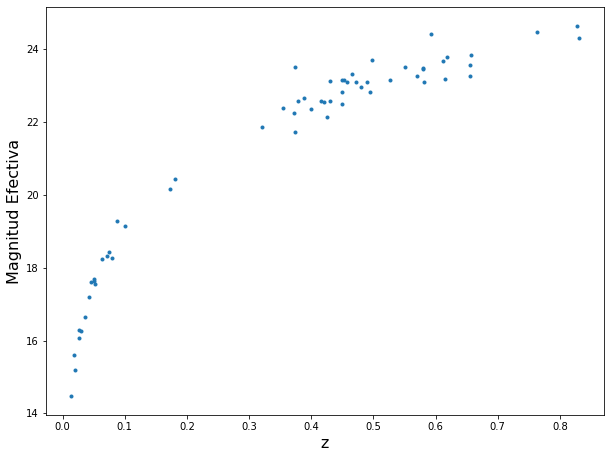

In [26]:
fig = plt.figure(figsize=(10, 7.5))
pl.plot(datos['z'], datos['Magnitud Efectiva'], marker='.', lw=0.0)

pl.xlabel('z', **label_style)
pl.ylabel('Magnitud Efectiva', **label_style)

Saul tuvo buenas razones para creer (en realidad, primero tuvo que modificarlas un poco) que todas las [supernovas de tipo Ia](https://es.wikipedia.org/wiki/Supernova_de_tipo_Ia) que se muestran aquí eran igualmente brillantes intrínsecamente, pero aquellas con alto desplazamiento al rojo parecían relativamente tenues en comparación con aquellas con bajo desplazamiento al rojo, ya que simplemente estaban más lejos. Esto explica la tendencia mostrada, dado que la 'magnitud efectiva' es la forma rara en la que los astrónomos suelen expresar cuán brillante parece algo.

Lo útil de esta medición es que la distancia a la que se encuentra una supernova o galaxia para un desplazamiento al rojo determinado depende de algunos parámetros, uno de los cuales es la cantidad de energía oscura que podría haber en el Universo. Casi todos esperaban que estos datos demostraran que no había _ninguna_ _Energía Oscura_, pero algunos creían lo contrario.

Cuando Hubble descubrió la expansión, una consecuencia natural fue que la cantidad de energía (de masa en reposo) contenida en un metro cúbico se diluiría con el tiempo. La _Energía Oscura_ sería especial, ya que la cantidad de energía por metro cúbico sería constante en el tiempo y sugeriría que algunos efectos misteriosos de la [mecánica cuántica](https://es.wikipedia.org/wiki/Mecánica_cuántica) estarían causando que las galaxias se separen.

Así que, usemos los datos de Saul para averiguar cuánta energía oscura hay en el universo. Primero, necesitamos un modelo para la distancia ([distancia luminosa](https://es.wikipedia.org/wiki/Escalera_de_distancias_cósmicas)) de una supernova con un desplazamiento al rojo dado, dada cierta cantidad de Energía Oscura. Usamos $\Omega_\Lambda$ para denotar la _fracción_ de toda la materia que se comporta como Energía Oscura.

In [27]:
from astropy.cosmology import FlatLambdaCDM

def lumdist(z, olambda):
  cosmo = FlatLambdaCDM(H0=70, Om0=1. - olambda, Tcmb0=2.725)
    
  return  cosmo.luminosity_distance(z)   

Luego, necesitamos convertir esta distancia en la forma en que los astrónomos miden el brillo:

In [28]:
def effmag(z, olambda, MB):
  DL = lumdist(z, olambda)   

  return MB + 5. * np.log10(DL.value)

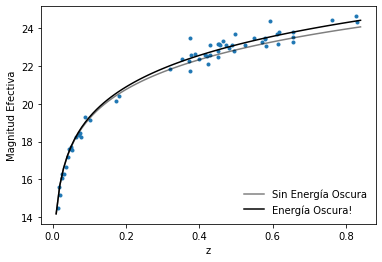

In [29]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(datos['z'], datos['Magnitud Efectiva'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k', label='Sin Energía Oscura', alpha=0.5)
pl.plot(zs, effmag(zs, 0.5, 6.), c='k', label='Energía Oscura!')

pl.xlabel('z')
pl.ylabel('Magnitud Efectiva')

pl.legend(loc=4, frameon=False)

Incluso a simple vista, los datos parecen preferir algo de energía oscura. Pero no hay una gran cantidad de puntos. Averigüemos qué prefieren exactamente los datos. Para hacer esto, asumimos que minimizar la distancia entre cada punto y la línea es la mejor medida de qué tan bien se ajusta la teoría a los datos (consulta este [link](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados)). Además de la fracción de energía oscura, tampoco sabemos qué tan brillante es intrínsecamente cada supernova, por lo que ajustaremos ambas simultáneamente.

In [30]:
from scipy.optimize import minimize

In [31]:
def chi2(x):
     olambda = x[0]
     MB      = x[1] 
    
     model   = effmag(datos['z'], olambda, MB) 
     
     return  np.sum((datos['Magnitud Efectiva'] - model)**2.) 

In [32]:
res = minimize(chi2, x0=[0.5, 5.0], options={'disp': True})

Optimization terminated successfully.
         Current function value: 6.018565
         Iterations: 10
         Function evaluations: 39
         Gradient evaluations: 13


In [33]:
res.x

array([0.75146015, 5.82802903])

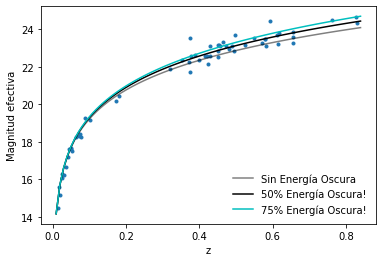

In [34]:
zs = np.arange(0.01, 0.85, 0.01)

pl.plot(datos['z'], datos['Magnitud Efectiva'], marker='.', lw=0.0)

pl.plot(zs, effmag(zs, 0.0, 6.), c='k',   label='Sin Energía Oscura', alpha=0.5)
pl.plot(zs, effmag(zs, 0.5, 6.), c='k',   label='50% Energía Oscura!')
pl.plot(zs, effmag(zs, 0.75, 6.), c='c', label='75% Energía Oscura!')

pl.xlabel('z')
pl.ylabel('Magnitud efectiva')

pl.legend(loc=4, frameon=False)

¡Así que hay algo así como 75% de energía oscura en el Universo! Siendo las primeras personas en realizar esta medición, Saul, junto con Brian Schmidt y Adam Reiss, recibirían el Premio Nobel 2011 por su trabajo.

![title](https://github.com/michaelJwilson/desihigh/blob/main/desihigh/images/perlmutter_nobel.jpg?raw=1)

Puedes encontrar todos los detalles [aquí](https://arxiv.org/pdf/astro-ph/9812133.pdf). Advertencia, esto es para los profesionales, así que no te preocupes si no comprendes mucho.

La principal motivación para DESI es repetir mediciones similares de desplazamientos al rojo de galaxias distantes, con mucha más precisión y aprender mucho más sobre esta espeluznante Energía Oscura.